<a href="https://colab.research.google.com/github/DataCrusade1999/Quantitative-Analytics/blob/master/Quantitative_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

In [51]:
uploaded=files.upload()

Saving D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv to D__Important Stuff_Machine Learning Datasets_apl_ohlc (1).csv


In [125]:
aapl=pd.read_csv(io.BytesIO(uploaded['D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv']))
#aapl['diff']=aapl.Open-aapl.Close

PERFORMING EDA ON DATA

In [126]:
print(aapl.head(5))

         Date       High        Low       Open      Close     Volume  Adj Close
0  2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800   9.241351
1  2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200   9.145061
2  2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700   9.305547
3  2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800   9.237648
4  2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700   9.162347


In [127]:
print(aapl.tail(5))

            Date       High        Low  ...      Close    Volume  Adj Close
1318  2011-12-23  57.655716  57.070000  ...  57.618572  67349800  49.790466
1319  2011-12-27  58.441429  57.574287  ...  58.075714  66269000  50.185513
1320  2011-12-28  58.321430  57.334286  ...  57.520000  57165500  49.705292
1321  2011-12-29  57.950001  57.215714  ...  57.874287  53994500  50.011452
1322  2011-12-30  58.040001  57.641430  ...  57.857143  44915500  49.996635

[5 rows x 7 columns]


In [128]:
print(aapl.shape)

(1323, 7)


In [129]:
print(aapl.columns)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [130]:
print(aapl.describe())

              High          Low  ...        Volume    Adj Close
count  1323.000000  1323.000000  ...  1.323000e+03  1323.000000
mean     29.237566    28.507684  ...  1.882896e+08    24.964252
std      14.199012    14.029758  ...  1.027007e+08    12.201417
min      10.568571    10.371428  ...  3.937360e+07     9.040131
25%      17.752857    17.182143  ...  1.122037e+08    15.063183
50%      25.642857    24.725714  ...  1.629866e+08    21.707180
75%      39.132858    38.351429  ...  2.316230e+08    33.442190
max      60.957142    59.427143  ...  8.432424e+08    52.124886

[8 rows x 6 columns]


In [131]:
print(aapl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1323 non-null   object 
 1   High       1323 non-null   float64
 2   Low        1323 non-null   float64
 3   Open       1323 non-null   float64
 4   Close      1323 non-null   float64
 5   Volume     1323 non-null   int64  
 6   Adj Close  1323 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.5+ KB
None


In [132]:
print(aapl.isnull())

       Date   High    Low   Open  Close  Volume  Adj Close
0     False  False  False  False  False   False      False
1     False  False  False  False  False   False      False
2     False  False  False  False  False   False      False
3     False  False  False  False  False   False      False
4     False  False  False  False  False   False      False
...     ...    ...    ...    ...    ...     ...        ...
1318  False  False  False  False  False   False      False
1319  False  False  False  False  False   False      False
1320  False  False  False  False  False   False      False
1321  False  False  False  False  False   False      False
1322  False  False  False  False  False   False      False

[1323 rows x 7 columns]


In [133]:
print(aapl.index)

RangeIndex(start=0, stop=1323, step=1)


In [134]:
print(aapl.iloc[[1,2], [0,2,3,4]])

         Date        Low       Open      Close
1  2006-10-03  10.455714  10.635715  10.582857
2  2006-10-04  10.451428  10.585714  10.768572


In [135]:
print(aapl.sample(20))

            Date       High        Low  ...      Close     Volume  Adj Close
900   2010-04-30  38.652859  37.285713  ...  37.298573  135615900  32.231163
150   2007-05-09  15.280000  14.984285  ...  15.268572  179439400  13.194173
1031  2010-11-04  45.740002  45.004284  ...  45.467144  160622000  39.289940
468   2008-08-12  25.612858  24.787144  ...  25.247143  209069700  21.817051
838   2010-02-01  28.000000  27.328571  ...  27.818571  187469100  24.039122
961   2010-07-28  37.998573  37.178570  ...  37.279999  129996300  32.215107
927   2010-06-09  35.985714  34.641430  ...  34.742859  213657500  30.022667
315   2008-01-03  28.198572  27.527143  ...  27.847143  210516600  24.063807
69    2007-01-11  13.825714  13.585714  ...  13.685715  360063200  11.826364
390   2008-04-22  24.000000  22.584286  ...  22.885714  359893100  19.776449
84    2007-02-02  12.178572  11.957143  ...  12.107142  155382500  10.462261
868   2010-03-16  32.139999  31.787144  ...  32.064285  111727000  27.708010

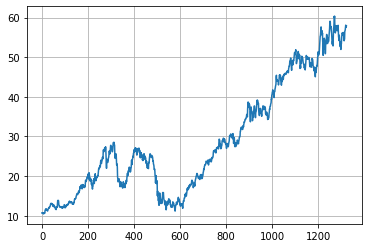

In [136]:
aapl['Close'].plot(grid=True)
plt.show()

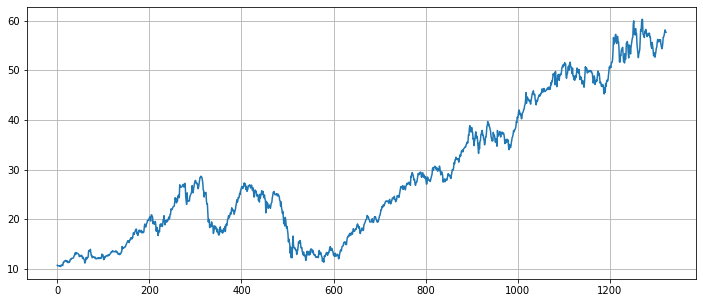

In [175]:
aapl['Open'].plot(grid=True,figsize=(12,5))
plt.show()

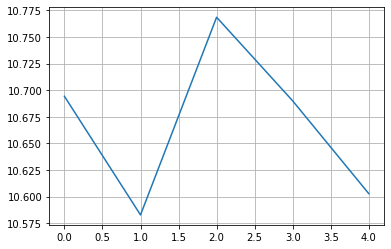

In [138]:
aapl['Close'].head(5).plot(grid=True)
plt.show()

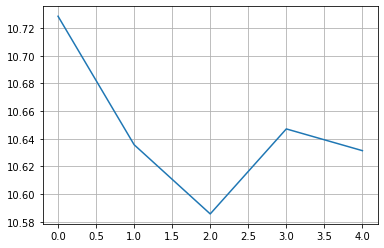

In [139]:
aapl['Open'].head(5).plot(grid=True)
plt.show()

COMMON FINANCIAL ANALYSIS

In [194]:
daily_close=aapl[['Adj Close']]
daily_pct_change=daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change.head(10))

   Adj Close
0   0.000000
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [195]:
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


In [196]:
#prefer this method while calculating daily percent change
daily_pct_change = daily_close / daily_close.shift(1) - 1
print(daily_pct_change.head(10))

   Adj Close
0        NaN
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [197]:
daily_log_returns_shift=np.log(daily_close / daily_close.shift(1))
print(daily_log_returns_shift.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


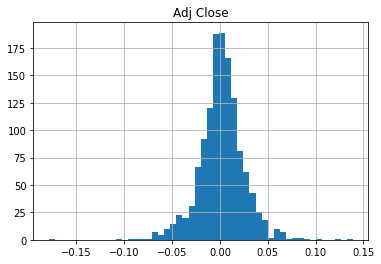

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [198]:
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

In [199]:
cum_daily_return=(1+daily_pct_change).cumprod()
print(cum_daily_return.head(10))

   Adj Close
0        NaN
1   0.989581
2   1.006947
3   0.999599
4   0.991451
5   0.996928
6   0.985974
7   0.978226
8   1.005344
9   1.002137


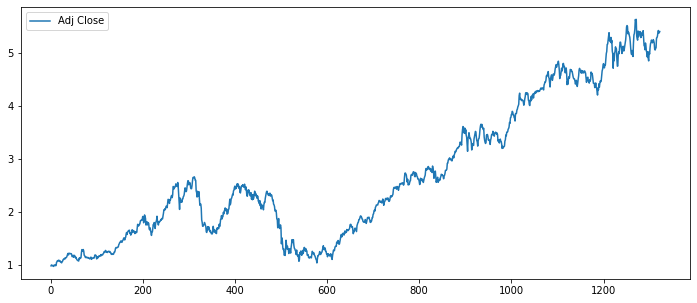

In [200]:
cum_daily_return.plot(figsize=(12,5))
plt.show()

In [224]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = [ 'TSLA','MSFT', 'IBM', 'GOOG','AAPL']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data)

                        High        Low  ...      Volume  Adj Close
Ticker Date                              ...                       
TSLA   2010-06-29  25.000000  17.540001  ...  18766300.0  23.889999
       2010-06-30  30.420000  23.299999  ...  17187100.0  23.830000
       2010-07-01  25.920000  20.270000  ...   8218800.0  21.959999
       2010-07-02  23.100000  18.709999  ...   5139800.0  19.200001
       2010-07-06  20.000000  15.830000  ...   6866900.0  16.110001
...                      ...        ...  ...         ...        ...
AAPL   2011-12-23  57.655716  57.070000  ...  67349800.0  49.790466
       2011-12-27  58.441429  57.574287  ...  66269000.0  50.185513
       2011-12-28  58.321430  57.334286  ...  57165500.0  49.705292
       2011-12-29  57.950001  57.215714  ...  53994500.0  50.011452
       2011-12-30  58.040001  57.641430  ...  44915500.0  49.996635

[5674 rows x 6 columns]


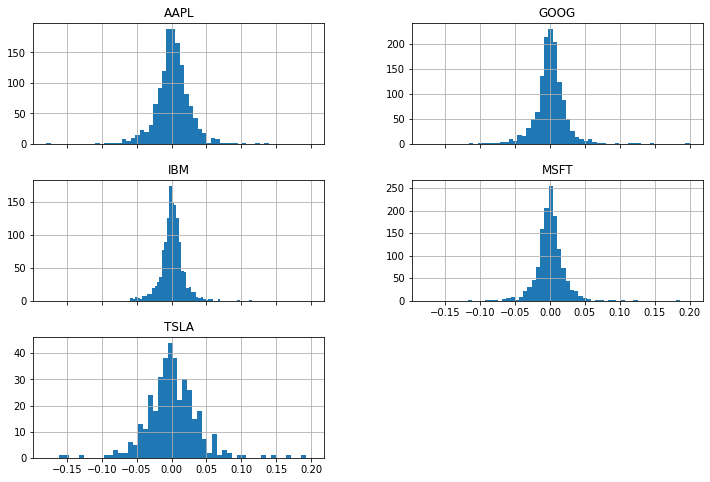

In [225]:
daily_close_nStocks=all_data[['Adj Close']].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change=daily_close_nStocks.pct_change()
daily_pct_change.hist(bins=50,sharex=True,figsize=(12,8))
plt.show()

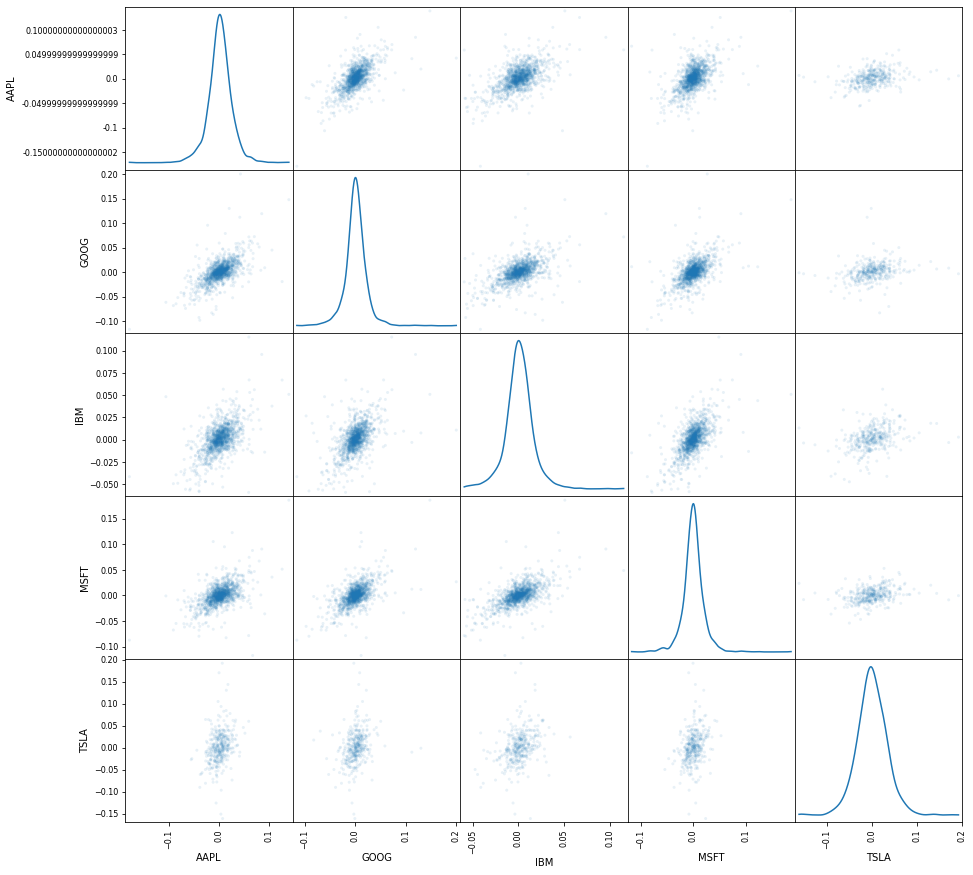

In [228]:
pd.plotting.scatter_matrix(daily_pct_change,diagonal='kde',figsize=(15,15),alpha=0.1)
plt.show()